In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
class CNN1_Net(nn.Module):
    def __init__(self,
                 kernel_size_1=5,
        stride_size=1,
        num_channels=1,
        depth_1=1,
        depth_2=5,
        kernel_size_2=5,
        num_hidden=20,
        num_labels=5
                ):
        super(CNN1_Net, self).__init__()
        
        self.classifier=nn.Sequential(
            nn.Conv1d(num_channels, depth_1, kernel_size=kernel_size_1),
            #nn.ReLU(),
            #nn.MaxPool1d(1),
            #nn.Dropout(0.1),
            #nn.Conv1d(in_channels=1, out_channels=1, kernel_size=5)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(depth_2*kernel_size_2, num_hidden),
            nn.ReLU(),
            nn.Dropout(0.5)
        )

        self.fc2 = nn.Sequential(
            nn.Linear(num_hidden, num_labels),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
    
    def forward(self,x):
        x=self.classifier(x)
        #x=self.fc1(x)
        #x=self.fc2(x)
        print(x)
        return(x)


In [10]:
#df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
#df.to_csv('shampoo.csv')
data=pd.read_csv('shampoo.csv')
print(data.columns)

Index(['Index', 'Month', 'Sales'], dtype='object')


In [11]:


#created a three dimensional tensor
#1. number of samples
#2. number of channels
#3. -1 means infer value from dimension


X=data.Sales.copy()
y=data.Sales.rolling(5).mean().copy()


#print(y)
batch_size=5

model=CNN1_Net()
optimizer=optim.Adam(model.parameters(), lr=0.01) #l2
criterion=nn.CrossEntropyLoss()

model.train()

values=[]
#print(X[:32])
for epoch in range(10):
    for batch in iterate_minibatches(X[:len(y)], y, batch_size):
        x_sublist,y_sublist=batch
        X2_tensor= torch.Tensor(np.array(x_sublist)).reshape(1,1,-1) #3 dimensional
        y2_tensor= torch.Tensor(np.array(y_sublist)).reshape(1,1,-1) #3 dimensional
        outputs=model(X2_tensor)
        print(X2_tensor,outputs)
        #loss_value=torch.mean((outputs - y2_tensor)**2)
        #print(loss_value)
        #loss=criterion(outputs,targets)
        #loss_value.backward()
        #optimizer2.step()
        #print('[%d] loss: %.3f' % (epoch, loss_value.item()))        
    
print(outputs)


             




tensor([[[-12.1768]]], grad_fn=<ConvolutionBackward0>)
tensor([[[266.0000, 145.9000, 183.1000, 119.3000, 180.3000]]]) tensor([[[-12.1768]]], grad_fn=<ConvolutionBackward0>)
tensor([[[15.6963]]], grad_fn=<ConvolutionBackward0>)
tensor([[[168.5000, 231.8000, 224.5000, 192.8000, 122.9000]]]) tensor([[[15.6963]]], grad_fn=<ConvolutionBackward0>)
tensor([[[-31.2528]]], grad_fn=<ConvolutionBackward0>)
tensor([[[336.5000, 185.9000, 194.3000, 149.5000, 210.1000]]]) tensor([[[-31.2528]]], grad_fn=<ConvolutionBackward0>)
tensor([[[21.4022]]], grad_fn=<ConvolutionBackward0>)
tensor([[[273.3000, 191.4000, 287.0000, 226.0000, 303.6000]]]) tensor([[[21.4022]]], grad_fn=<ConvolutionBackward0>)
tensor([[[-39.0768]]], grad_fn=<ConvolutionBackward0>)
tensor([[[289.9000, 421.6000, 264.5000, 342.3000, 339.7000]]]) tensor([[[-39.0768]]], grad_fn=<ConvolutionBackward0>)
tensor([[[27.9894]]], grad_fn=<ConvolutionBackward0>)
tensor([[[440.4000, 315.9000, 439.3000, 401.3000, 437.4000]]]) tensor([[[27.9894]]], 

Sales tensor([[[266.0000, 145.9000, 183.1000, 119.3000, 180.3000, 168.5000, 231.8000,
          224.5000, 192.8000, 122.9000, 336.5000, 185.9000, 194.3000, 149.5000,
          210.1000, 273.3000, 191.4000, 287.0000, 226.0000, 303.6000, 289.9000,
          421.6000, 264.5000, 342.3000, 339.7000, 440.4000, 315.9000, 439.3000,
          401.3000, 437.4000, 575.5000, 407.6000, 682.0000, 475.3000, 581.3000,
          646.9000]]])
Avg tensor([[[178.9200, 159.4200, 176.6000, 184.8800, 199.5800, 188.1000, 221.7000,
          212.5200, 206.4800, 197.8200, 215.2600, 202.6200, 203.7200, 222.2600,
          237.5600, 256.2600, 259.5800, 305.6200, 301.1200, 324.3800, 331.6000,
          361.7000, 340.5600, 375.5200, 387.3200, 406.8600, 433.8800, 452.2200,
          500.7600, 515.5600, 544.3400, 558.6200]]])
Kernel tensor([[[205.9500, 164.5000, 151.2000, 149.8000, 174.4000, 200.1500, 228.1500,
          208.6500, 157.8500, 229.7000, 261.2000, 190.1000, 171.9000, 179.8000,
          241.7000, 232.350

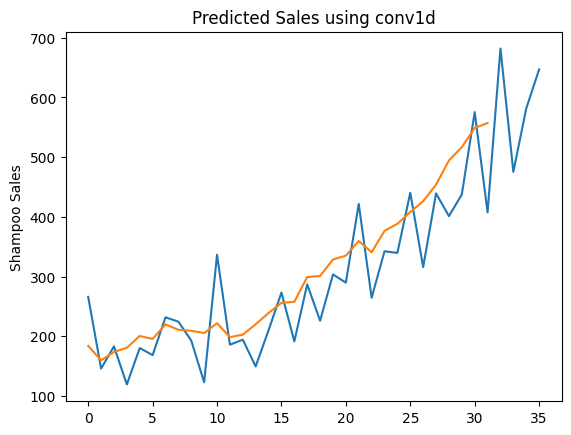

In [12]:
net = nn.Conv1d(1, 1, 5,  bias = False)
optimizer=optim.Adam(net.parameters(), lr=0.01) #l2
running_loss=0.0

X=data.Sales.copy()
y=data.Sales.rolling(5).mean().copy()


X_tensor = torch.Tensor(X).reshape(1, 1, -1)
print("Sales", X_tensor)
y=y[4:,].to_numpy()
y_tensor = torch.Tensor(y).reshape(1, 1, -1)
print("Avg", y_tensor)

ts_tensor = torch.Tensor(X).reshape(1, 1, -1)
kernel = [0.5, 0.5]
kernel_tensor = torch.Tensor(kernel).reshape(1, 1, -1)
print("Kernel", F.conv1d(ts_tensor, kernel_tensor))

for epoch in range(1000):
    #for batch in iterate_minibatches(X, y, batch_size):
        #x_prime,y_prime=batch
        #X_tensor= torch.Tensor(np.array(x_prime)).reshape(1,1,-1) #3 dimensional
        #y_tensor= torch.Tensor(np.array(y_prime)).reshape(1,1,-1) #3 dimensional
        
        optimizer.zero_grad()
        outputs=net(X_tensor)
        #print("Outputs",outputs)
        loss_value = torch.mean((outputs - y_tensor)**2)
        loss_value.backward()
        optimizer.step()
        
        running_loss += loss_value.item()

        if epoch % 100 == 0:
            print('[%d] loss: %.3f' % (epoch, loss_value.item()))
            print(net.weight.data.numpy())
            
            
prediction = (net(X_tensor).data).float()
prediction=(prediction.numpy().flatten())
data.Sales.plot()
plt.plot(prediction)
plt.title('Predicted Sales using conv1d')
plt.ylabel("Shampoo Sales")
plt.show()

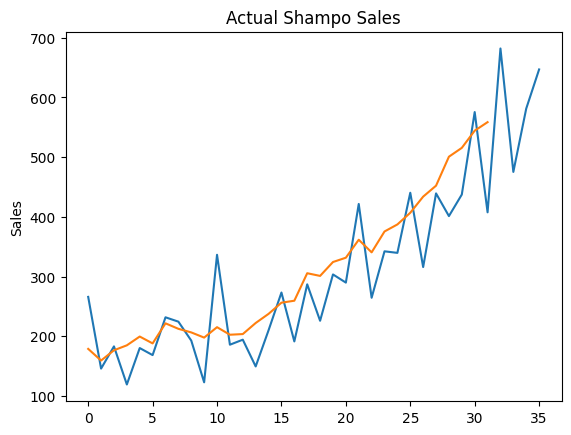

In [13]:
data.Sales.plot()
plt.plot(y)
plt.title("Actual Shampo Sales")
plt.ylabel("Sales")
plt.show()